In [1]:
import numpy as np ## numpy is a library for mathematical functions and numerics
import pandas as pd ## pandas is a library for working with data frames
import scanpy as sc ## scanpy allows us working with single-cell omics data. besca is built upon scanpy
import matplotlib.pyplot as plt ## matplotlib offers functions for visualizations
from scipy import sparse, io ## scipy provides algorithms for optimization, integration, and other numerical operations
import besca as bc ## besca enables reproducible single-cell analysis for translational studies
import seaborn as sns ## seaborn is a high-level plotting library
import os ## standard library to interact with the operational system
from IPython.display import HTML ## allow displaying HTML blocks

sc.logging.print_header() ## print software versions for logging

### set color for dotplots
mypal=sns.color_palette("light:#5A9", as_cmap=True)

Global seed set to 0


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.4.3 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [2]:
sc.settings.verbosity = 3 
sequential_colors = sns.color_palette("GnBu_d", 10)
sns.set(style="whitegrid") # palette="GnBu_d"
cmap = 'viridis'

# Define folder - notebook location
root_path = os.getcwd()
prevfolder = os.path.join(root_path, 'plots/') # Directory where plots will be saved
mplots = True # Set to True in order to export the plots

# Define the folder for plots 
sc.set_figure_params()
sc.settings.figdir = prevfolder

In [3]:
ROSS_SERVER =  '' ## Roche server
condition = 'dblabel' # 'dblabel' is a controlled vocabulary of cell types, which are labels stored in our database, hence the name `dblabel`
cond2 = condition # this is used as major split -- e.g. cell types
min_cells = 10 # Minimum number of cells per celltype. Only celltypes with a number above the threshold will be plotted

In [4]:
## If single gene 
## myg_geneID_orig='MAP4K1'

# If multiple genes use:
myg_geneID_orig=['FOXP3', 'PDCD1'] ## other options: ['EPCAM', 'CEACAM5', 'FAP', 'PTPRC']

# We use two dictionaries to store the results of the two genes in which we are interested in
summarydf={}
summarydf2={}

# Cutoffs for dotplots 
dmax=0.3; vmax=0.6
dmaxb=dmax*2; vmaxb=vmax*2

In [5]:
url = ROSS_SERVER + '/scseq/Smillie2019_human_IBD/analyzed/standard_2_7_incl_batch/adata_celltype_annotation_extended.h5ad'
filename = 'Colon_healthy_inflamed.h5ad'

adata = sc.read(filename, backup_url=url)

cond1='Health' ### this is used to partition (e.g. days/treaments/categories)
cond3='Subject' ### this is used as replicates
cond2=condition='Cluster'
title="Colon_healthy_inflamed"

In [6]:
X = adata.X
y = adata.obs
display(y)

,CELL,Cluster,Health,Location,Subject,celltype_highlevel,nGene,nUMI,original_name,percent_mito,n_counts,n_genes,louvain,Type,dblabel
0,N7.EpiA.AAGCAAGAGTCAAC-Epi,Cycling TA,Non-inflamed,Epi,N7,Epi,1507,7428,N7.EpiA.AAGCAAGAGTCAAC,0.057351,7428.0,1507,9,Epithelial,proliferating transit amplifying cell
1,N7.EpiA.ACGAGGGAGCTGAT-Epi,Enterocyte Progenitors,Non-inflamed,Epi,N7,Epi,828,2877,N7.EpiA.ACGAGGGAGCTGAT,0.009037,2877.0,828,4,Epithelial,enterocyte progenitor
2,N7.EpiA.ACGTTTACTGGTAC-Epi,Immature Enterocytes 2,Non-inflamed,Epi,N7,Epi,2318,15332,N7.EpiA.ACGTTTACTGGTAC,0.133707,15332.0,2318,7,Epithelial,immature enterocyte
3,N7.EpiA.AGAGAATGGTCATG-Epi,Enterocyte Progenitors,Non-inflamed,Epi,N7,Epi,884,3498,N7.EpiA.AGAGAATGGTCATG,0.002001,3498.0,884,4,Epithelial,enterocyte progenitor
4,N7.EpiA.AGAGCGGAGTATGC-Epi,TA 1,Non-inflamed,Epi,N7,Epi,858,3261,N7.EpiA.AGAGCGGAGTATGC,0.003067,3261.0,858,4,Epithelial,transit amplifying cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149727,N110.LPB.TTTGCGCAGGGTTCCC-Imm,Macrophages,Inflamed,LP,N110,Imm,1172,3549,N110.LPB.TTTGCGCAGGGTTCCC,0.063398,3549.0,1172,6,Myeloid,macrophage
149728,N110.LPB.TTTGCGCCATGTCGAT-Imm,Plasma,Inflamed,LP,N110,Imm,1356,9534,N110.LPB.TTTGCGCCATGTCGAT,0.019194,9534.0,1356,0,B_cells,plasma cell
149729,N110.LPB.TTTGCGCTCAACGAAA-Imm,CD4+ Activated Fos-hi,Inflamed,LP,N110,Imm,858,2084,N110.LPB.TTTGCGCTCAACGAAA,0.051344,2084.0,858,1,T_cells,"activated CD4-positive, alpha-beta T cell"
149730,N110.LPB.TTTGCGCTCAACGGCC-Imm,Plasma,Inflamed,LP,N110,Imm,1753,12962,N110.LPB.TTTGCGCTCAACGGCC,0.019981,12962.0,1753,0,B_cells,plasma cell


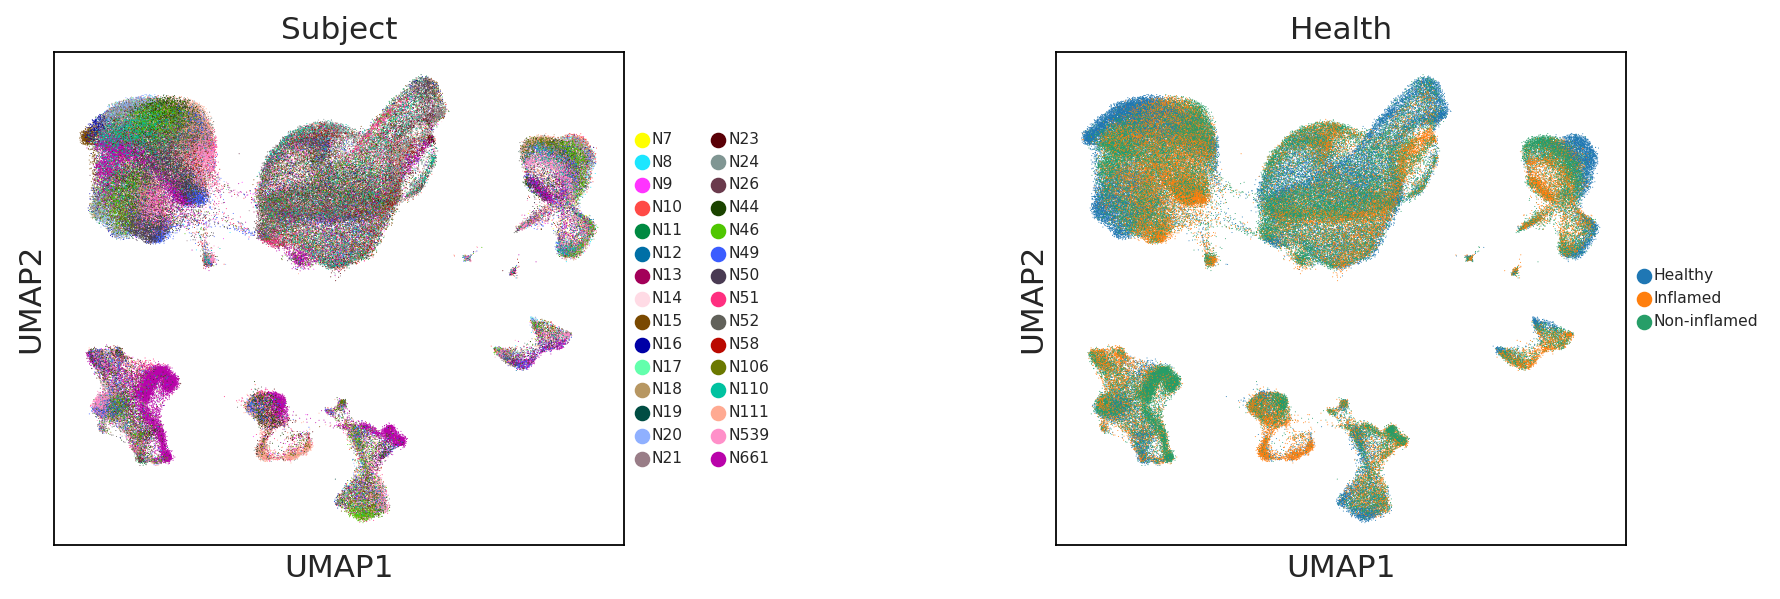

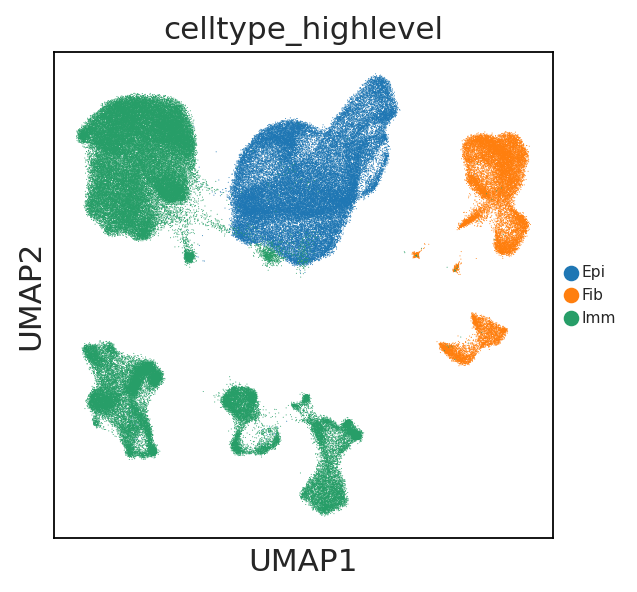

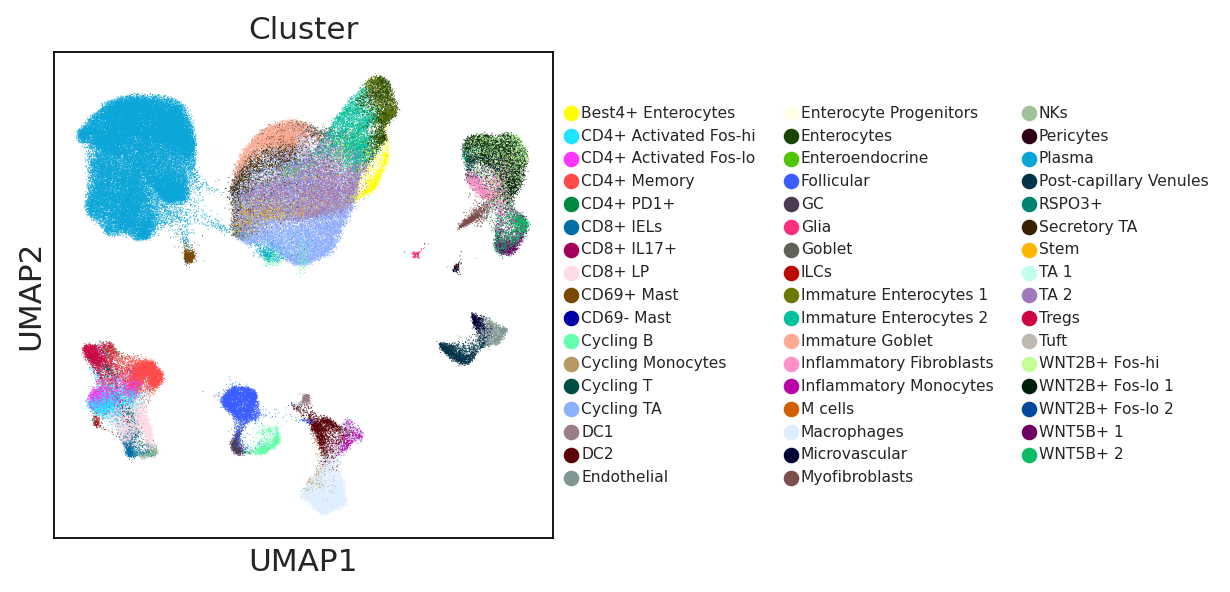

In [7]:
# Data clutering (UMAP)
if mplots==True:
    sc.pl.umap(adata, color=[cond3,cond1], legend_fontsize=7, wspace = 0.6, save='_'+title+'_Patient_Disease.png')
    sc.pl.umap(adata, color=["celltype_highlevel"], legend_fontsize=7, wspace = 0.6, save='_'+title+'_celltype1.png')
    sc.pl.umap(adata, color=[condition], legend_fontsize=7, wspace = 0.6, save='_'+title+'_DBlabel.png')
else:
    sc.pl.umap(adata, color=[cond3,cond1], legend_fontsize=7, wspace = 0.6)
    sc.pl.umap(adata, color=["celltype_highlevel"], legend_fontsize=7, wspace = 0.6)
    sc.pl.umap(adata, color=[condition], legend_fontsize=7, wspace = 0.6)

## Random Forest classification
We use random forest classifier to identify the cell types that have more distinguishable cells between healthy and inflamed.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

thresh = 2000
accs = []
cell_finals = []

cell_types = list(adata.obs['dblabel'].unique())
print(cell_types)
for i in range(len(cell_types)):
    selected_cells = adata[adata.obs['dblabel'].isin([cell_types[i]])].copy()

    X = selected_cells.X
    y_str = selected_cells.obs.loc[:,'Health']
    y_str = np.array(y_str)
    
    num_healthy = np.count_nonzero(y_str == 'Healthy')
    num_inflamed = np.count_nonzero(y_str == 'Inflamed')
    ratio = num_healthy / num_inflamed 

    if X.shape[0] > thresh and ratio > 0.6 and ratio < 1.8 :
        X_sub = []
        y = []
        for j in range(len(y_str)):

            if y_str[j] == 'Healthy':
                y.append(0) 
                X_sub.append(X[j])
                
            elif y_str[j] == 'Inflamed':
                y.append(1)
                X_sub.append(X[j])

                
        X = np.array(X_sub)
        y = np.array(y)
        print(cell_types[i], X.shape, y.shape)
        print(np.count_nonzero(y == 0) , np.count_nonzero(y == 1) , np.count_nonzero(y == 2))

        X, y = shuffle(X, y, random_state=0)

        X = X[:thresh]
        y = y[:thresh]


        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

        print(X_train.shape , X_test.shape)

        random_forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
        random_forest_clf.fit(X_train , y_train)
        acc = random_forest_clf.score(X_test , y_test)
        print(acc)
        
        cell_finals.append(cell_types[i])
        accs.append(acc)


['proliferating transit amplifying cell', 'enterocyte progenitor', 'immature enterocyte', 'transit amplifying cell', 'immature goblet cell', 'enterocyte', 'brush cell', 'goblet cell', 'stem cell', 'enteroendocrine cell', 'microfold cell', 'fibroblast', 'microvascular endothelial cell', 'myofibroblast cell', 'inflammatory fibroblast', 'endothelial cell', 'HEV endothelial cell', 'pericyte cell', 'glial cell', 'proliferating T cell', 'plasma cell', 'CD1c-positive myeloid dendritic cell', 'CD8-positive, alpha-beta T cell', 'macrophage', 'proliferating B cell', 'germinal center B cell', 'proliferating monocyte', 'follicular B cell', 'CD141-positive myeloid dendritic cell', 'inflammatory monocyte', 'regulatory T cell', 'activated CD4-positive, alpha-beta T cell', 'exhausted-like CD4-positive, alpha-beta T cell', 'mast cell', 'CD8-positive, alpha-beta cytokine secreting effector T cell', 'natural killer cell', 'CD4-positive, alpha-beta memory T cell', 'innate lymphoid cell']
proliferating tra

[6 9 7 5 4 8 2 3 0 1]


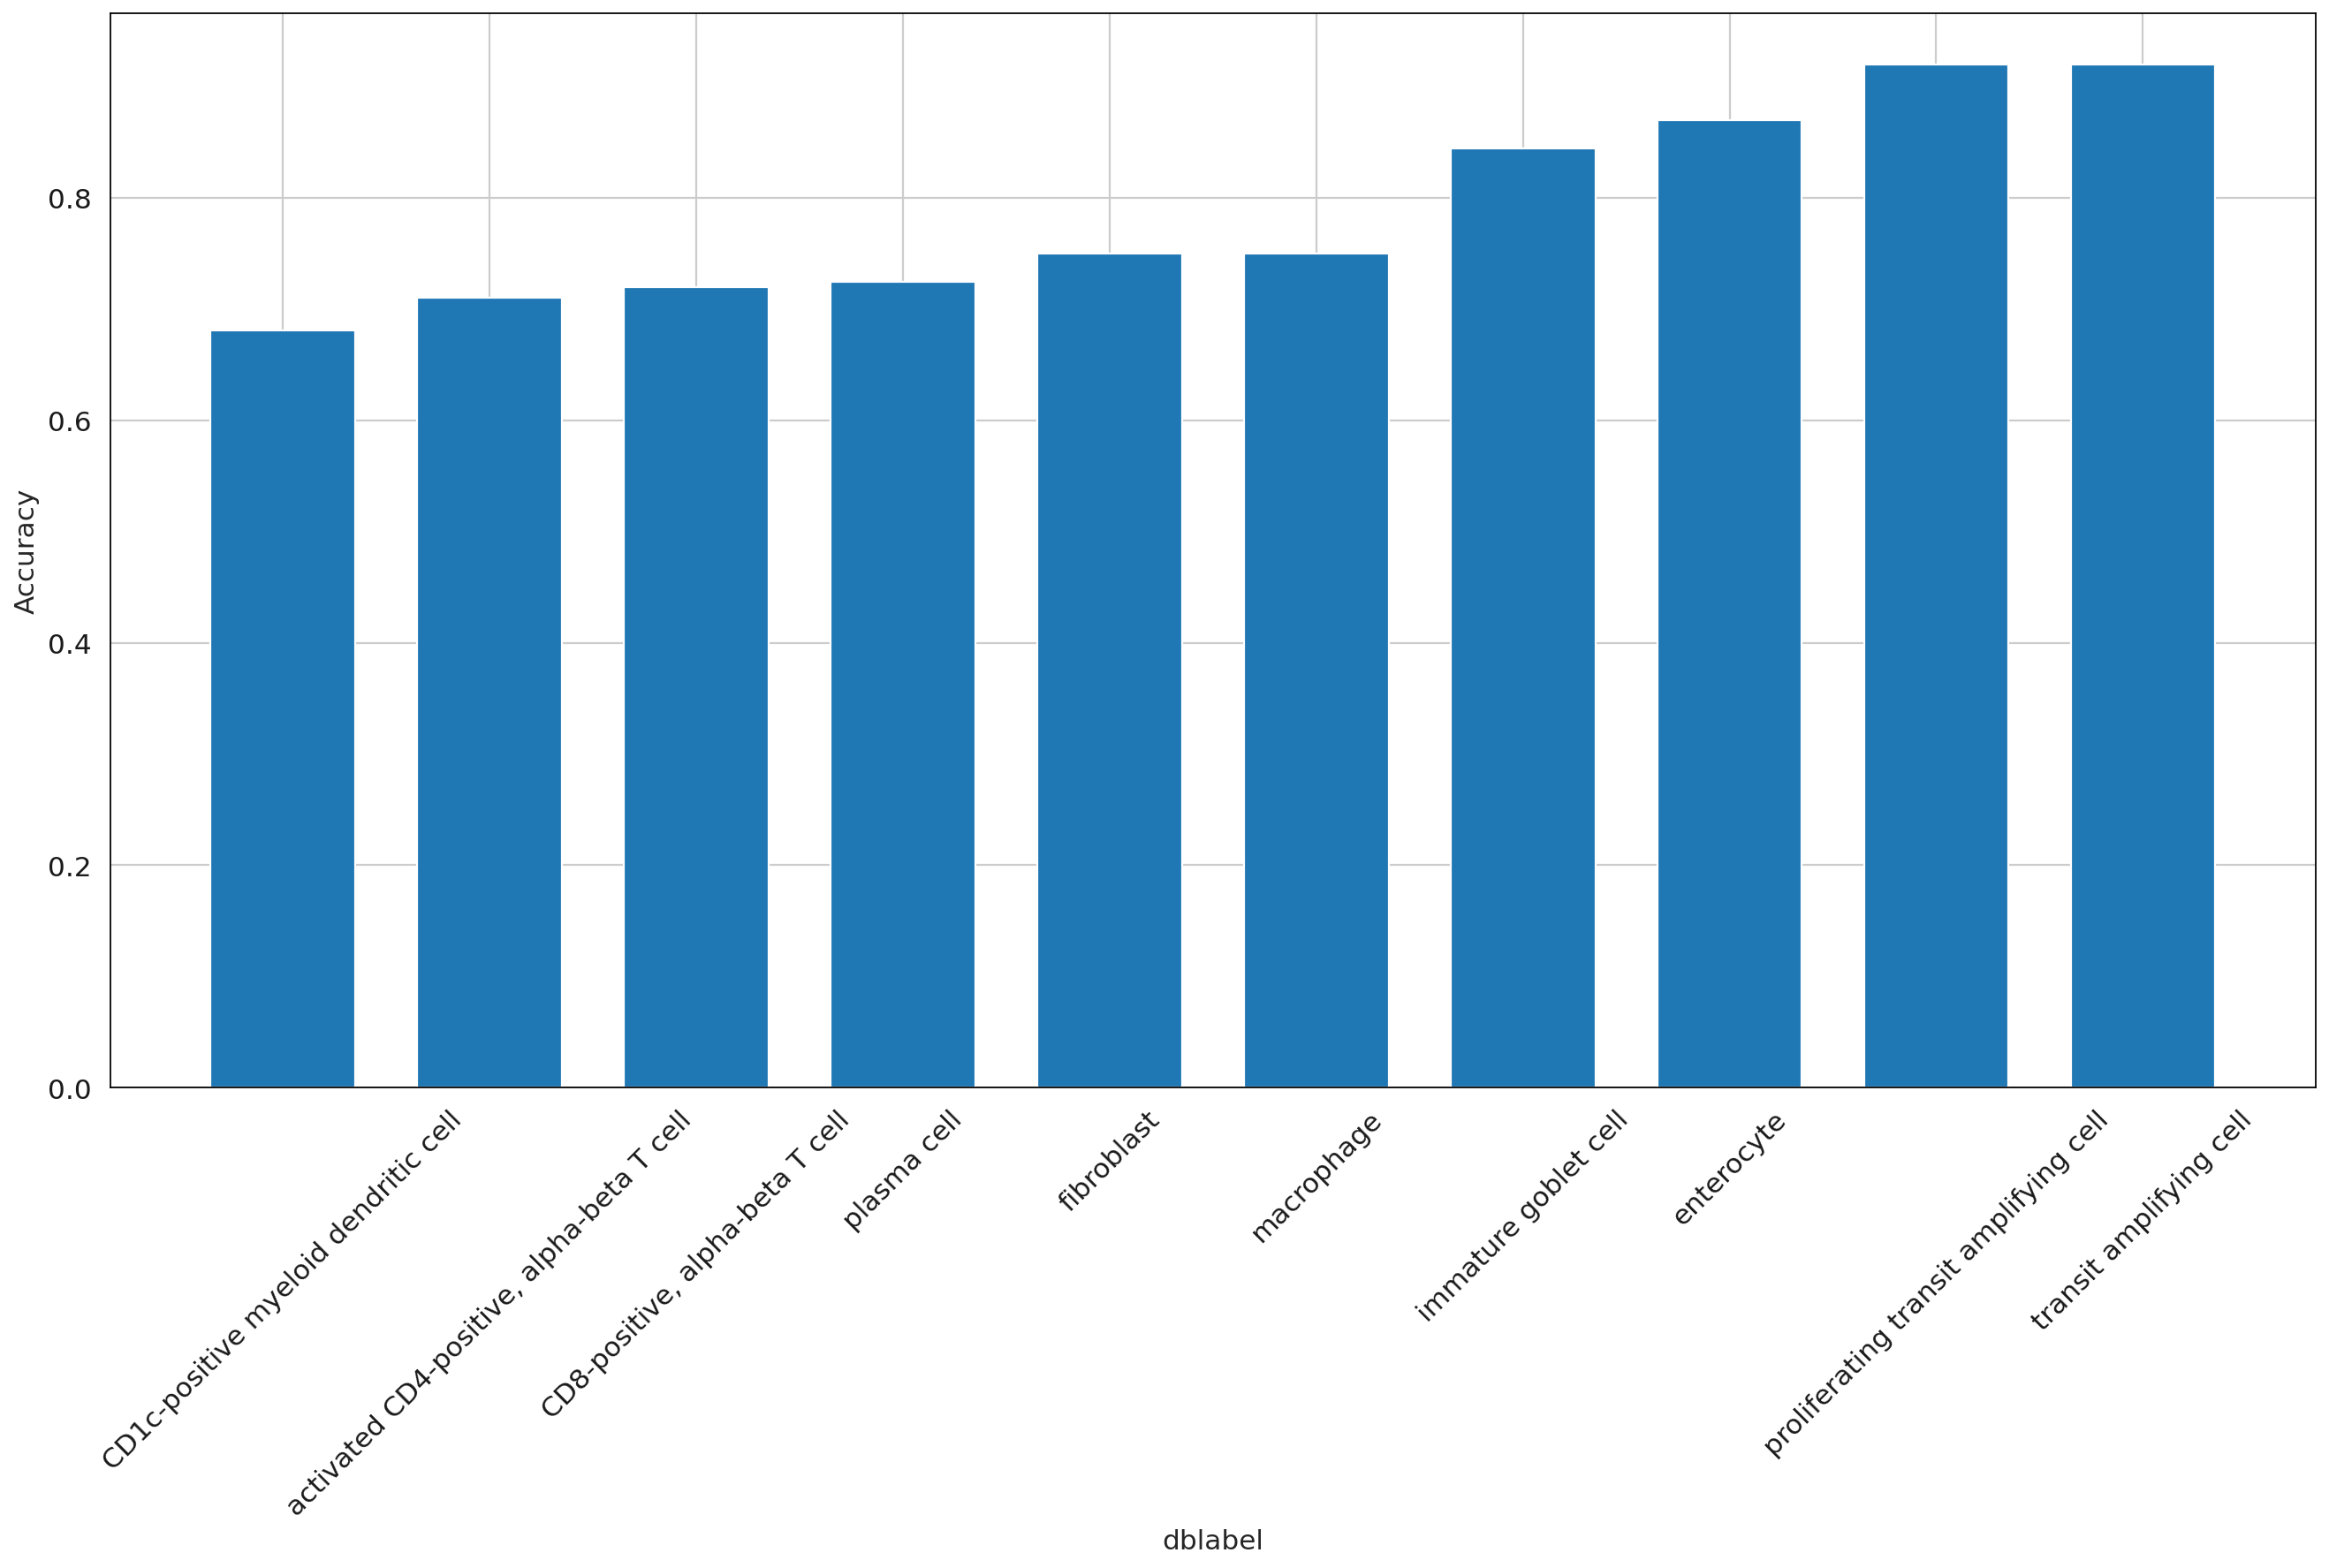

In [9]:
accs = np.array(accs)
cell_finals = np.array(cell_finals)
index = np.argsort(accs)
print(index)
accs_sorted = accs[index]
cell_finals_sorted = cell_finals[index]

plt.figure(figsize=[20, 10])

plt.bar(cell_finals_sorted, accs_sorted, width = 0.7)
plt.xticks(rotation=45)
plt.xlabel('dblabel')
plt.ylabel('Accuracy')

plt.savefig('acc_celltype.pdf' , bbox_inches='tight')

## Visulization:
Now, we visualize the best and worst cell types in terms of classification accuracy:

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


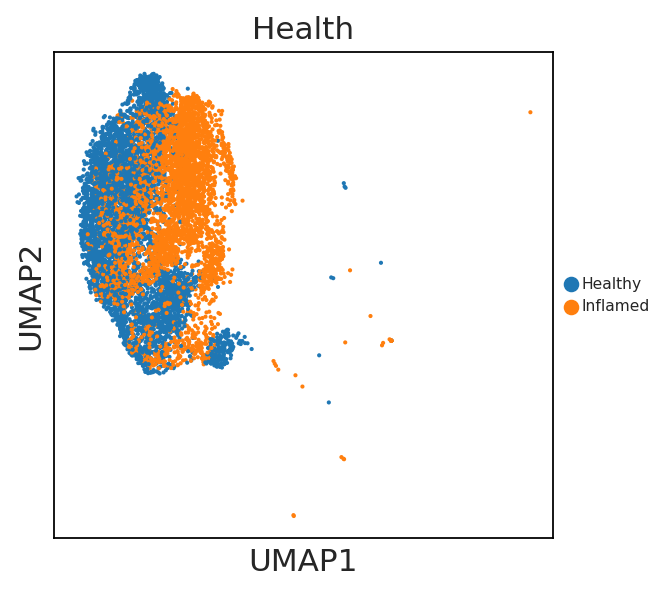

running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


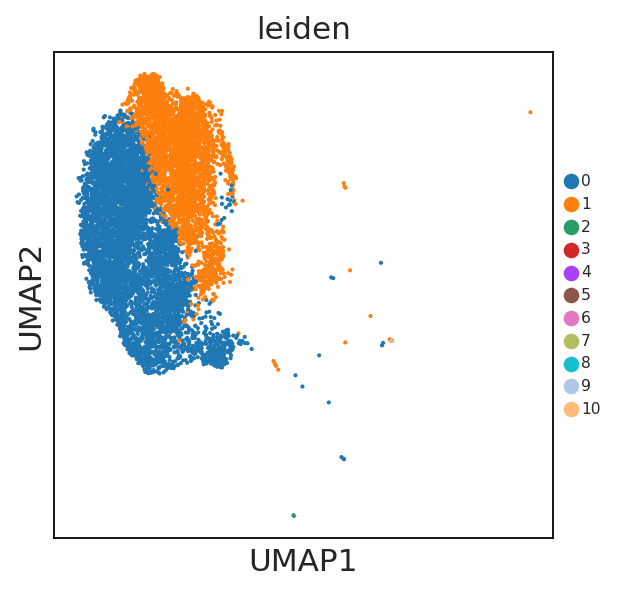

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


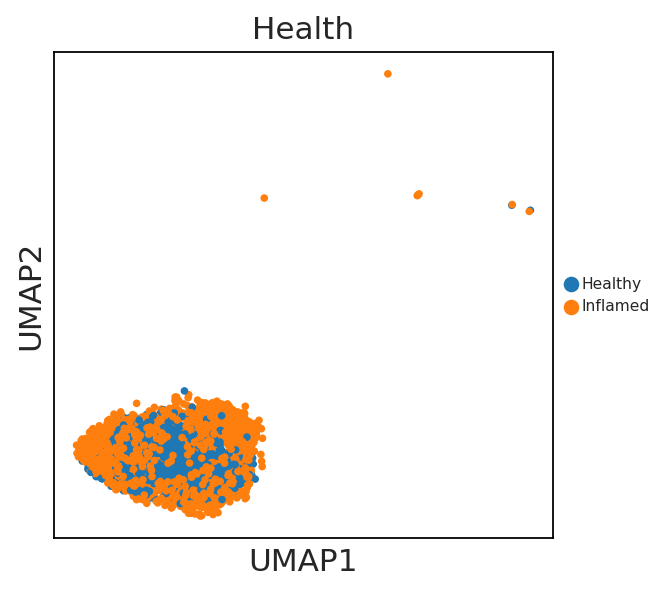

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


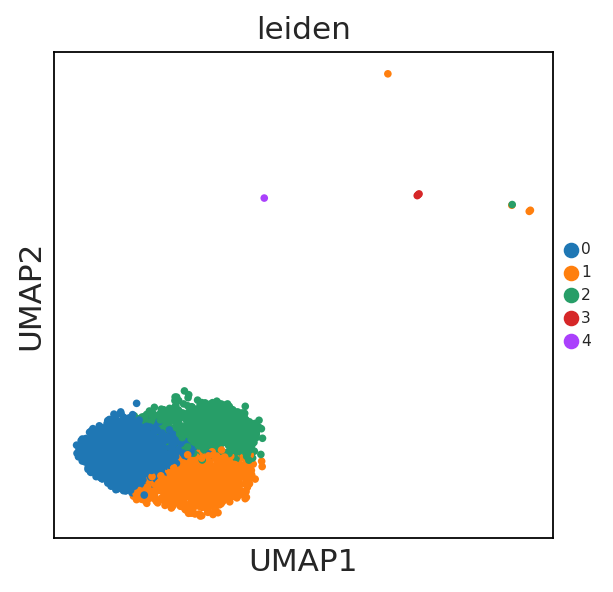

In [11]:
import numpy as np

# transit amplifying cell
selected_cells=adata[adata.obs['dblabel'].isin(['transit amplifying cell'])].copy()
selected_cells=selected_cells[selected_cells.obs['Health'].isin(['Inflamed', 'Healthy'])].copy()
sc.tl.umap(selected_cells)
sc.pl.umap(selected_cells, color=['Health'], legend_fontsize=7, wspace = 0.6)
sc.tl.leiden(selected_cells, resolution = 0.1)
sc.pl.umap(selected_cells, color=['leiden'], legend_fontsize=7, wspace = 0.6)


# activated CD4-positive, alpha-beta T cell
selected_cells=adata[adata.obs['dblabel'].isin(['activated CD4-positive, alpha-beta T cell'])].copy()
selected_cells=selected_cells[selected_cells.obs['Health'].isin(['Inflamed', 'Healthy'])].copy()
sc.tl.umap(selected_cells)
sc.pl.umap(selected_cells, color=['Health'], legend_fontsize=7, wspace = 0.6)
sc.tl.leiden(selected_cells, resolution = 0.5)
sc.pl.umap(selected_cells, color=['leiden'], legend_fontsize=7, wspace = 0.6)

